## Plant Classification MVP

This project involves using neural networks and transfer learning to classify leaves by plant type. There are 11 classes total. 

This notebook outlines initial modeling. A simple baseline neural network will be built.

In [16]:
#transfer learning model
from tensorflow import keras
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False)

58900480/58889256 [==============================] - 4s 0us/step


In [23]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/Users/mehikapatel/Plant_NN_Project/data'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 1592)


Found 1592 images belonging to 11 classes.


In [24]:
validation_features, validation_labels = extract_features(validation_dir, 341) 

Found 341 images belonging to 11 classes.


In [28]:
test_features, test_labels = extract_features(test_dir, 344) 

Found 344 images belonging to 11 classes.


In [29]:
#flatten images:

train_features = np.reshape(train_features, (1592, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (341, 4 * 4 * 512))
test_features = np.reshape(test_features, (344, 4 * 4 * 512))

In [30]:
#train on recorded data/labels:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

/Users/mehikapatel/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/30
80/80 [==============================] - 8s 16ms/step - loss: -27.7537 - acc: 0.1011 - val_loss: -82.8494 - val_acc: 0.0968
Epoch 2/30
80/80 [==============================] - 1s 12ms/step - loss: -100.6260 - acc: 0.0927 - val_loss: -153.4381 - val_acc: 0.0968
Epoch 3/30
80/80 [==============================] - 1s 11ms/step - loss: -177.5466 - acc: 0.0892 - val_loss: -228.2289 - val_acc: 0.0968
Epoch 4/30
80/80 [==============================] - 1s 11ms/step - loss: -242.2584 - acc: 0.1080 - val_loss: -306.1248 - val_acc: 0.0968
Epoch 5/30
80/80 [==============================] - 1s 11ms/step - loss: -330.1721 - acc: 0.0958 - val_loss: -387.3577 - val_acc: 0.0968
Epoch 6/30
80/80 [==============================] - 1s 11ms/step - loss: -410.1954 - acc: 0.0857 - val_loss: -471.4100 - val_acc: 0.0968
Epoch 7/30
80/80 [==============================] - 1s 11ms/step - loss: -481.6176 - acc: 0.1035 - val_loss: -558.4261 - val_acc: 0.0968
Epoch 8/30
80/80 [=========================

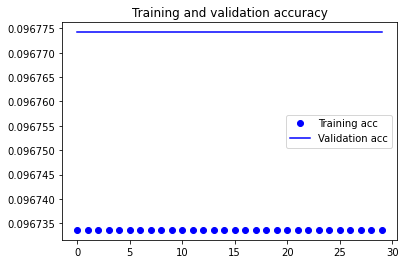

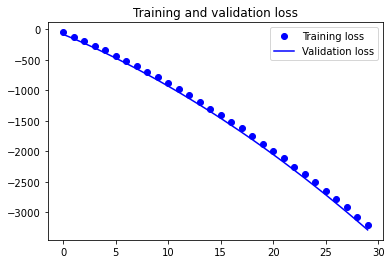

In [31]:
#loss and accuracy curves during training;
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()